<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Влияние-категориальных-переменных-на-стоимость-квадратного-метра:" data-toc-modified-id="Влияние-категориальных-переменных-на-стоимость-квадратного-метра:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Влияние категориальных переменных на стоимость квадратного метра:</a></span></li></ul></li><li><span><a href="#Исследуем-данные-по-непроданным-объектам-недвижимости" data-toc-modified-id="Исследуем-данные-по-непроданным-объектам-недвижимости-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследуем данные по непроданным объектам недвижимости</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [244]:
import pandas as pd
import matplotlib as plt

## Предобработка данных

In [178]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Выводы
1. Всего в датафрейме представлены 23 699 измерений. 
2. По колонкам 
`ceiling_height`
`floors_total`
`living_area`
`is_appartment`
`kitchen_area`
`balcony`
`locatility_name`
`airports_nearest`
`citiCenters_nearest`
`parks_nearest`
`ponds_nearest`
`days_exposition`
Присутствуют пустые значения, необходимо дополнительно исследовать каждую из них.
3. Колонки
`citiCenters_nearest`
`parks_around3000`
`ponds_around3000` переименуем для удобства дальнейшего использования.
4. Остальные колонки по набору данных выглядят полноценными, необходимо проверить записи на дубликаты, аномальные значения и распределние представленных значений. 


In [180]:
#Приведем наименование колонок в удобный вид
df = df.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'})

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

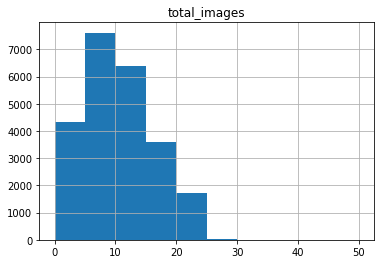

In [181]:
#Изучим значения в колонке total_images
df.hist(column='total_images')
df['total_images'].describe()

Минимальное значение - 0, максимальное - 50, медиана - 9. Распределение выглядит нормальным. 
Возможно, отсуствует ограничение на количество изображений по объявлению, это может стать причиной отказа инфраструктуры из-за нагрузки. 
Идем дальше. 

In [182]:
#Изучим значения в колонке last_price
df['last_price'] = df['last_price'].astype('int') # изменим тип значений в колонке на int для более комфортного отображения

(df['last_price']/1000).describe()


count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

Одно из значений явно выбивается из общей картины, необходимо изучить его подробнее

In [183]:
df.query('last_price<15000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Значение указано в тысячах рублей, домножим его на 1000, чтобы получить значение в рублях, как во всей остальной таблице и повторим исследование значений колонки

In [184]:
df.loc[8793,'last_price'] = df.loc[8793,'last_price']*1000

In [185]:
(df['last_price']/1000).describe()

count     23699.000000
mean       6542.062625
std       10886.992466
min         430.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

Теперь расрпеделение выглядит нормальным. Двигаемся дальше. 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

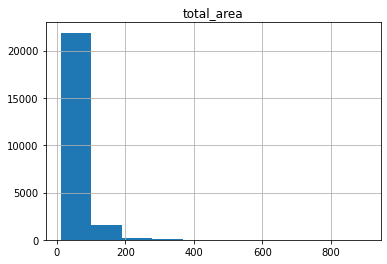

In [186]:
# Изучим значения колонки total_area
df.hist(column='total_area')
df['total_area'].describe()

Распределение выглядит нормальным. 

In [187]:
#Изучим значение колонки first_day_exposition


df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format = '%Y-%m-%d') #Переведем тип данных в datetime и сократим до дня

df['first_day_exposition'].describe()

/tmp/ipykernel_25/1886861775.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['first_day_exposition'].describe()


count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Видим, что данные представлены за промежуток времени с 2014 по 2019 гг. 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

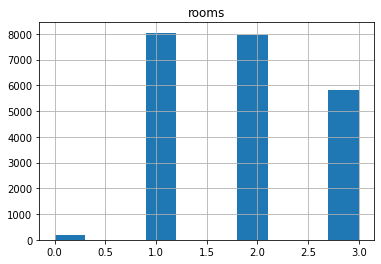

In [188]:
# изучим данные колонки rooms
df.hist(column = 'rooms', range = (0,3))
df['rooms'].describe()

Изучим подронее данные о квартирах с количеством комнат = 0. 

In [189]:
print (df.query('rooms==0')['total_area'].describe())

df.pivot_table(index = 'rooms', values = 'total_area', aggfunc = ['min', 'median'])

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64


,min,median
,total_area,total_area
rooms,,
0,15.5,26.05
1,12.0,36.56
2,20.0,53.00
3,40.1,73.00
4,42.0,99.30
5,40.0,146.45
6,87.0,184.30
7,100.6,214.00


Встречаются данные от 15.5 м2 до 371 м2. Всего таких значений порядка 1% от общего количества измерений. Вероятнее всего, данный параметр не является обязательным при заполнении объявления. Также, встречаются объявления со свободной планировкой, где в отсутствие сделанного ремонта неизвестно количетсво комнат.
Так как, количество комнат может влиять на стоимость квадратного метра недвижимости и с учетом разброса данных, удалим из дата фрейма данные записи. 

In [190]:
df = df.query('rooms!=0')

count    23502.000000
mean         5.869841
std          4.865664
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

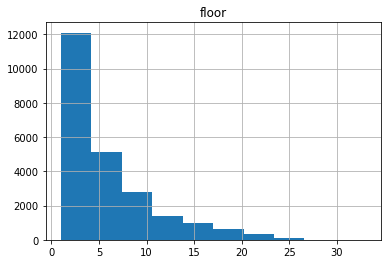

In [191]:
#Изучим данные о колонке floor
df.hist(column = 'floor')
df['floor'].describe()

Данные выглядят корректно. 

count    23419.000000
mean        10.622273
std          6.569964
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

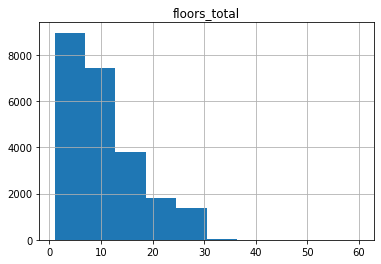

In [192]:
#Изучим данные в колонке floors_total

df.hist(column='floors_total')
df['floors_total'].describe()


По 86 значениям не заполнена этажность дома. Заполним пропуски значением этажа, на котором расположен объект недвижимости. 

In [193]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().sum()

0

In [194]:
# Изучим данные в колонке studio
df['studio'].value_counts()

False    23491
True        11
Name: studio, dtype: int64

In [195]:
# Изучим данные в колонке open_plan
df['open_plan'].value_counts()

False    23494
True         8
Name: open_plan, dtype: int64

In [196]:
# Изучим данные в колонке locality_name
df['locality_name'].value_counts()

Санкт-Петербург               15611
посёлок Мурино                  495
посёлок Шушары                  436
Всеволожск                      392
Пушкин                          369
                              ...  
поселок Жилгородок                1
деревня Тихковицы                 1
село Шум                          1
деревня Лаврики                   1
садовое товарищество Садко        1
Name: locality_name, Length: 362, dtype: int64

Данные о локации не заполнены по 49 значениям, что составляет менее 1% от общего количетсва данных. Учитывая, что локация напрямую влияет на стоимость недвижимости выполним следующие шаги:

1. Для целей исследования категаризируем данные на два значения, Санкт-Петербург и Ленинградская область. 
2. По расстоянию от центра определим входит ли объект недвижимости в Санкт-Петербург или же относится к области.
3. Строки, где не заполнен и населенный пункт и удаленность от цента, удалим из таблицы.

In [197]:
df.pivot_table(index = 'locality_name', values = 'city_centers_nearest', aggfunc = ['max', 'median', 'min'])

,max,median,min
,city_centers_nearest,city_centers_nearest,city_centers_nearest
locality_name,,,
Зеленогорск,62706.0,53381.0,51115.0
Колпино,37477.0,32018.0,29436.0
Красное Село,41792.0,29140.5,27317.0
Кронштадт,51511.0,49575.0,46657.0
Ломоносов,61495.0,51677.0,36816.0
Павловск,36445.0,32683.0,31533.0
Петергоф,49574.0,33771.0,29815.0
Пушкин,35610.0,27930.5,24311.0


Из сводной таблицы видно, что областным объект недвижимости можно считать, если он удален более, чем на 30 000 метров. 

In [198]:
#Удаляем данные с незаполненными полями locality_name
df = df[(df['locality_name'].isna()==False)]

df['locality_name'] = df['locality_name'].str.replace('посёлок','')
df['locality_name'] = df['locality_name'].str.replace('поселок','')

df['locality_name'].value_counts()

Санкт-Петербург      15611
 Мурино                529
 Шушары                436
Всеволожск             392
Пушкин                 369
                     ...  
 Дружноселье             1
деревня Ялгино           1
 Рабитицы                1
деревня Курковицы        1
 Тёсово-4                1
Name: locality_name, Length: 328, dtype: int64

In [199]:
def location_categories(location):
    if location == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    return 'Ленинградская область'
# Категоризируем значения. 
df['location'] = df['locality_name'].apply(location_categories)

In [200]:
#Заполним пропущенные значения колонки is_apartment значениям 0

df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'].isna().sum()

0

In [201]:
# Заполним пропущенные значения колонки balcony значением 0
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

In [202]:
df['ceiling_height'].describe()

count    14408.000000
mean         2.769392
std          1.248634
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Порядка 30% записей в таблице не имеют значения в колонке. Также встречаются аномальные значения. 
Так как медиана не подврежена выбросам и так как цель исследования - определение рыночной стоимости объектов недвижимости, заполним пропущенные и аномальные значения медианными значениями.

In [203]:
median_height = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_height)

def no_to_anomal_height(height):
    if height > 4 or height < 2:
        height = median_height
    return height

df['ceiling_height'] = df['ceiling_height'].apply(no_to_anomal_height)

df['ceiling_height'].describe()

count    23453.000000
mean         2.693054
std          0.204704
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [204]:
# Изучим данные в колонке parks_around
df['parks_around'].describe()

count    18022.000000
mean         0.613639
std          0.802954
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around, dtype: float64

Приблизительно 15% строк не имеют значения в колонке parks_around. 
Вероятно, данное поле заполняется пользователем. Предположительно, если в зоне досигаемости от объекта есть парк, то пользователь заполнит об этом информацию, если данные отсутствуют, то парков рядом - нет. 
Заполним пропуски значением 0. 
Также, изменим тип значений в поле на int, так как не может быть нецелое количетсво парков. 


In [205]:
df['parks_around'] = df['parks_around'].fillna(0)
df['parks_around'] = df['parks_around'].astype('int')

In [206]:
df['ponds_around'].describe()

count    18022.000000
mean         0.769337
std          0.938369
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around, dtype: float64

Ситуация с данными аналогичная колонке `parks_around`, заполним пропуски значением 0 и изменим тип данных на int

In [207]:
df['ponds_around'] = df['ponds_around'].fillna(0)
df['ponds_around'] = df['ponds_around'].astype('int')

count    20287.000000
mean       181.398827
std        220.147815
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

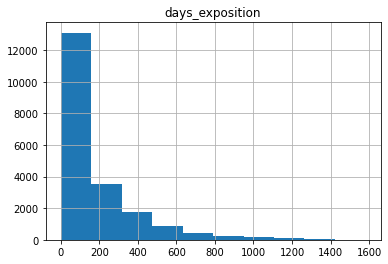

In [208]:
df.hist(column = 'days_exposition')
df['days_exposition'].describe()

Несколько тысяч записей не имеют значений в поле `days_exposition`. Предположительно это поле вычисляется после снятия объявления с продажи. Как следствие, не заполнена дата по объявлением, актуальным на день выгрузки данных. Заполним пропуски значением разности даты публикации и даты выгрузки данных. Дату выгрузки данных возьмем, как максимальную дату публикации объявления. 

In [209]:
df['meter_price'] = df['last_price']/df['total_area']
df['meter_price']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: meter_price, Length: 23453, dtype: float64

In [210]:
#Выполним расчет стоимости одного квадратного метра для каждого объекта недвижимости
df['meter_price'] = df['last_price']/df['total_area']
df['meter_price']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: meter_price, Length: 23453, dtype: float64

In [211]:
def is_selled(days_exposition):
    try:
        int(days_exposition)
        return True
    except ValueError:
        return False

df['is_selled'] = df['days_exposition'].apply(is_selled)
df['is_selled'].value_counts()

df.pivot_table(index = 'is_selled', values = 'meter_price', aggfunc = 'mean')


,meter_price
is_selled,
False,108419.400202
True,97947.033256


In [212]:
date = df['first_day_exposition'].max()
df['days_exposition'] = df['days_exposition'].fillna((date - df['first_day_exposition']).dt.days)

df['days_exposition'].isna().sum()

0

In [213]:
# Изучим данные в колноке ponds_nearest
df[df['ponds_nearest'].isna() == True]['ponds_around'].value_counts()

0    14437
Name: ponds_around, dtype: int64

По данным выше видно, что значение ближайшего пруда отсутствует только в случае, если значение колонки `ponds_nearest` = 0. 
Для целей исследования достаточно колонки `ponds_around`, поэтому не будем заполнять пропущенные значения.

In [214]:
# Изучим данные в колноке ponds_nearest
df[df['parks_nearest'].isna() == True]['parks_around'].value_counts()

0    15418
Name: parks_around, dtype: int64

По данным выше видно, что значение ближайшего пруда отсутствует только в случае, если значение колонки `ponds_nearest` = 0. Для целей исследования достаточно колонки `ponds_around`, поэтому не будем заполнять пропущенные значения.

In [215]:
# Изучим данные в колонке city_centers_nearest
df[df['city_centers_nearest'].isna() == True]

# Создаем сводную таблицу с медианным расстоянием до аэропорта и центра Санкт-Петербурга по населенным пунктам.
cities_and_airports_pivot = df.pivot_table(
    index = 'locality_name', values = ['airports_nearest', 'city_centers_nearest'], aggfunc = 'median')

# Группируем данные с основным дата фреймом
cities_and_airports_pivot.columns = ['airport_distance_mean', 'city_center_distance_mean']
df = df.merge(cities_and_airports_pivot, on = 'locality_name', how = 'left')

In [216]:
cities_and_airports_pivot

,airport_distance_mean,city_center_distance_mean
locality_name,,
Александровская,12896.5,27468.0
Белоостров,57769.0,38868.0
Левашово,52693.0,25727.0
Лисий Нос,55909.0,28226.0
Металлострой,25758.0,27602.0
Молодёжное,84665.0,65764.0
Мурино,51553.0,21888.0
Парголово,53426.0,19325.0
Песочный,54831.5,26099.5


In [217]:
df[df['airport_distance_mean'].isna()==True]['locality_name']


# Заполняем пропущенные данные медианными значениями 
df['airports_nearest'] = df['airports_nearest'].fillna(df['airport_distance_mean'])
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_center_distance_mean'])

print (df['city_center_distance_mean'].isna().sum())
print (df['airport_distance_mean'].isna().sum())



4813
4813


Учитывая, что количество строк с незаполненными данными остается на уровне 5%, заполним их медианным значением по Ленинградской области. 

In [218]:
median_airport = df.query('location == "Ленинградская область"')['airports_nearest'].median()
median_city = df.query('location == "Ленинградская область"')['city_centers_nearest'].median()
# Заполняем пропущенные данные медианными значениями 
df['airports_nearest'] = df['airports_nearest'].fillna(median_airport)
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(median_city)

print (df['airports_nearest'].isna().sum())
print (df['city_centers_nearest'].isna().sum())

0
0


Отсутсвующие данные в колонках `living_area` и `kitchen_area` вероятнее всего связаны с отсутствием соотвтетсвующих знаний и документов под рукой у пользователя в момент публикаци объявления. 

Данные значения могут понадобиться для доп вычислений, поэтому выполним замену, вычислив медианный процент жил площади и площади кухни по всему датафрейму.

In [219]:
#Рассчитываем медианы
living_area_median = (df['living_area']/df['total_area']).median()
kitchen_area_median = (df['kitchen_area']/df['total_area']).median()

#Заполняем пропуски
df['living_area'] = df['living_area'].fillna(df['total_area']*living_area_median)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_area_median)

#Смотрим результат
print(df['living_area'].describe())
print(df['kitchen_area'].describe())

count    23453.000000
mean        34.686666
std         22.349254
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64
count    23453.000000
mean        10.533745
std          6.017176
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [220]:
# Изменим типы значений в полях

df['floors_total'] = df['floors_total'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')

In [221]:
df['days_exposition'] = df['days_exposition'].astype('int')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23452
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23453 non-null  int64         
 1   last_price                 23453 non-null  int64         
 2   total_area                 23453 non-null  float64       
 3   first_day_exposition       23453 non-null  datetime64[ns]
 4   rooms                      23453 non-null  int64         
 5   ceiling_height             23453 non-null  float64       
 6   floors_total               23453 non-null  int64         
 7   living_area                23453 non-null  float64       
 8   floor                      23453 non-null  int64         
 9   is_apartment               23453 non-null  bool          
 10  studio                     23453 non-null  bool          
 11  open_plan                  23453 non-null  bool          
 12  kitc

## Расчёты и добавление результатов в таблицу

In [223]:
#Категаризируем данные по этажу 

def floor_categories (floor, total_floors):
    if floor == 1:
        return 'Первый'
    elif floor == total_floors:
        return 'Последний'
    return 'Другой'

df['floor_category'] = df.apply(lambda x: floor_categories(x['floor'], x['floors_total']) ,axis = 1)
df['floor_category'].value_counts()

Другой       17161
Последний     3398
Первый        2894
Name: floor_category, dtype: int64

In [224]:
#Найдем отношения жилой площади и площади кухни к общей площади объекта недвижимости

df['living_to_total_area'] = df['living_area']/df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area']/df['total_area']

In [225]:
# Найдем явные дубликаты
df.duplicated().sum()

0

## Исследовательский анализ данных

count    23453.000000
mean       186.255063
std        233.607236
min          0.000000
25%         43.000000
50%         95.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64

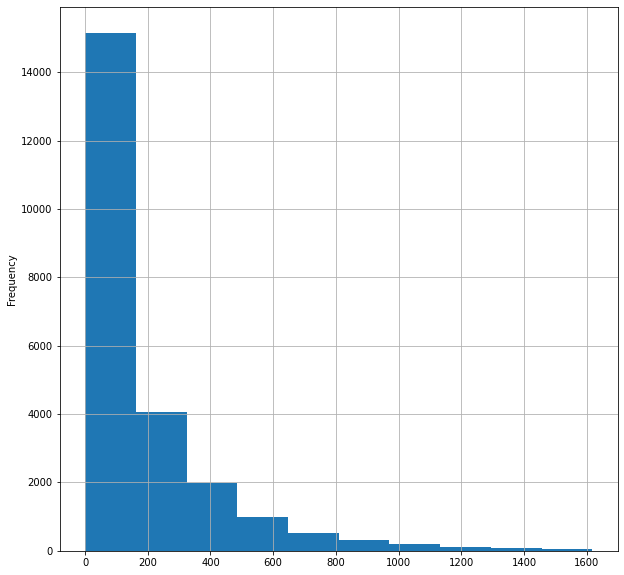

In [226]:
#Изучим время продади квартир

df['days_exposition'].plot(kind = 'hist', figsize = (10,10), grid = True, bins = 10)
df['days_exposition'].describe()

<AxesSubplot:>

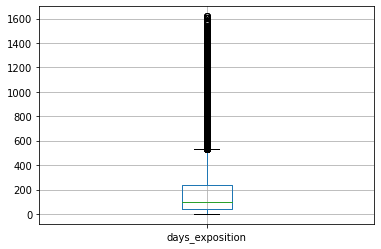

In [227]:
df.boxplot(column = 'days_exposition')

Из приведенных диаграмм можно сделать следующие выводы: 
1. Третий квартиль составляет 238 дней, гистограмма подтверждает данные, большая часть объектов недвижимости была продана быстрее, чем за 200 дней. 
2. Значительное количество объявлений превышают межквартильный размах и имеют значение > 450 дней. Данные значения можно назвать аномальными. Причины долгих продаж необходимо исследовать дополнительно. 
Гипотезы: 
    1. Слишком высокая цена за квадратный метр. (Дополнительные исследования осложняются тем, что в данных указана финальная цена объекта недвижимости, которая могла меняться с течением времени.)
    2. Отсутсвие спроса на объект недвижимости из-за неудобной локации.
    3. Пользователь не снял объявление с площадки после продажи объекта. 
3. Минимальное значение = 0, это же значение соответствует нижней границе межквартильного рахмаха. Предположительно, такие объявления имели цену, ниже рыночной. 

Изучим цену квадратного метра недвижимости по Санкт-Петербургу и Ленинградской области по объектам со сроком продажи более 450 дней и сравним с аналогичными значениями объектов, проданных ранее, чем за 550 дней. 

In [228]:
(
    df.query('days_exposition>550').pivot_table(index = 'location', values = 'meter_price', aggfunc = ['mean', 'count'])
        .merge(
             df.query('days_exposition<550').pivot_table(index = 'location', values = 'meter_price', aggfunc = ['mean', 'count'])
         ,on = 'location'
         )
)

,mean_x,count_x,mean_y,count_y
,meter_price,meter_price,meter_price,meter_price
location,,,,
Ленинградская область,67567.068805,546,68712.246864,7295
Санкт-Петербург,124088.374572,1254,113988.116105,14353


В Санкт-Петербурге цена объектов недвижимости, которые продаются дольше - ниже, чем цена объектов, которые продаются оперативно. 
Учитывая, что у нас нет историчности данных, а также то, что цель исследования - определить рыночную цену объектов недвижимости - создадим новый дата фрейм, куда войдут только данные со сроком публикации в нормальном рапределении. 

In [229]:
good_data = df.query('days_exposition<365 & is_selled == True')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17249 entries, 1 to 23449
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               17249 non-null  int64         
 1   last_price                 17249 non-null  int64         
 2   total_area                 17249 non-null  float64       
 3   first_day_exposition       17249 non-null  datetime64[ns]
 4   rooms                      17249 non-null  int64         
 5   ceiling_height             17249 non-null  float64       
 6   floors_total               17249 non-null  int64         
 7   living_area                17249 non-null  float64       
 8   floor                      17249 non-null  int64         
 9   is_apartment               17249 non-null  bool          
 10  studio                     17249 non-null  bool          
 11  open_plan                  17249 non-null  bool          
 12  kitc

Проверим коэффициенты корреляции между ценой квадратного метра и количеством квадратных метров, этажом, этажностью, количеством комнат, удаленностью от центра

<AxesSubplot:>

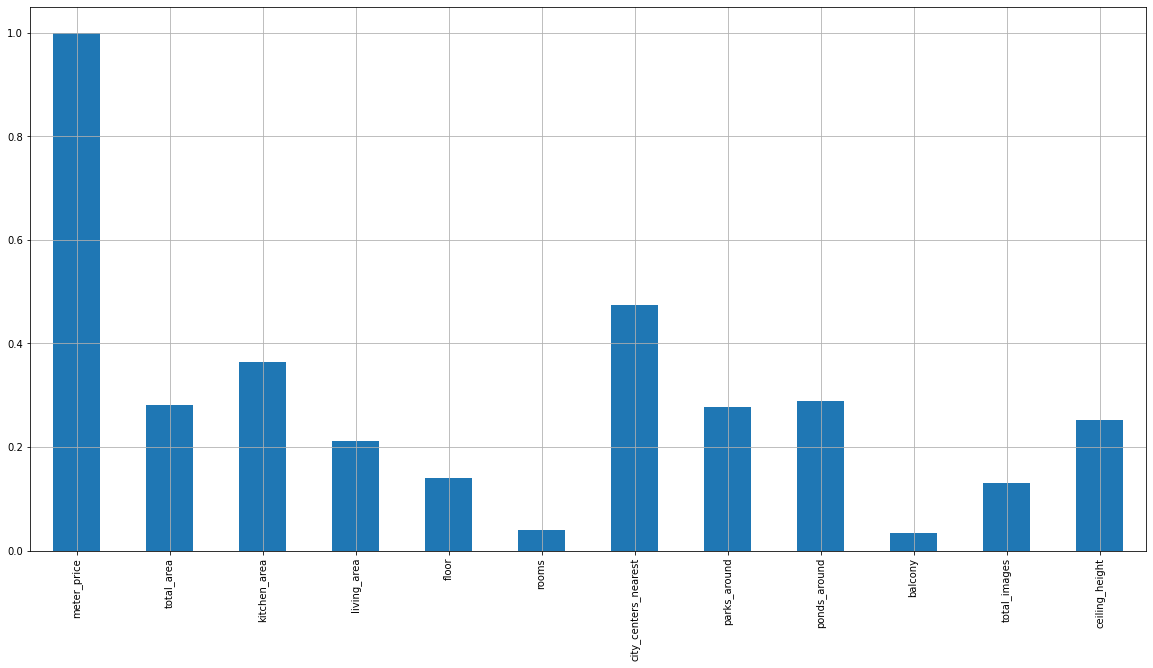

In [230]:
(
    good_data[['meter_price', 
               'total_area', 
               'kitchen_area', 
               'living_area', 
               'floor', 
               'rooms', 
               'city_centers_nearest', 
               'parks_around', 
               'ponds_around', 
               'balcony', 
               'total_images', 
               'ceiling_height']].corr()
    ['meter_price'].abs().plot(grid = True, figsize = (20,10), kind = 'bar')
)

/tmp/ipykernel_25/2236466219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['day_of_week_exposition'] = good_data['first_day_exposition'].dt.dayofweek
/tmp/ipykernel_25/2236466219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['month_exposition'] = good_data['first_day_exposition'].dt.month
/tmp/ipykernel_25/2236466219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<AxesSubplot:xlabel='year_exposition'>

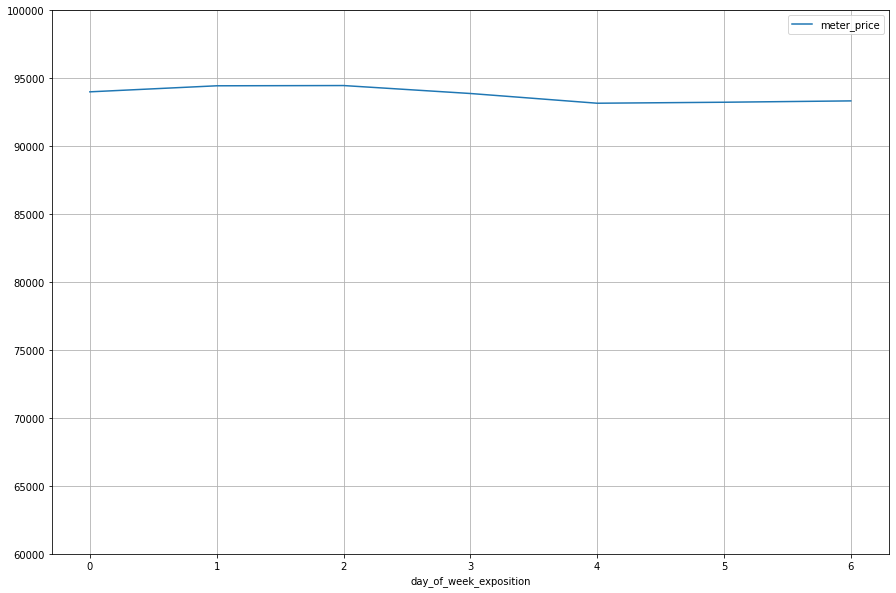

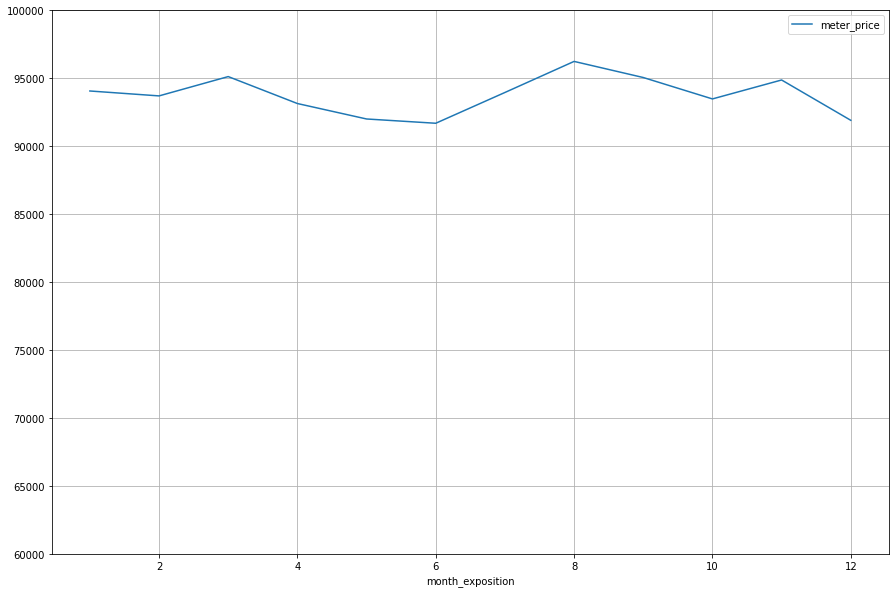

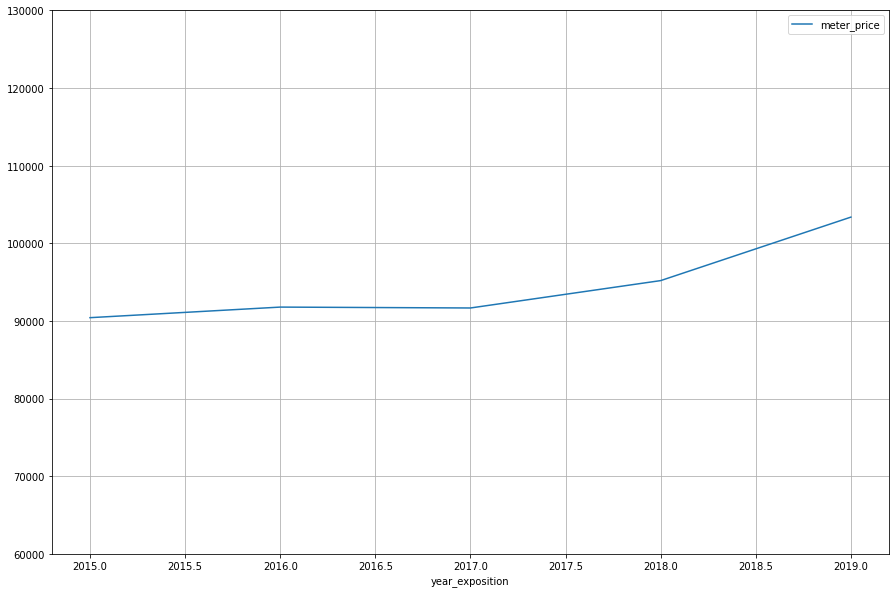

In [231]:
good_data['day_of_week_exposition'] = good_data['first_day_exposition'].dt.dayofweek
good_data['month_exposition'] = good_data['first_day_exposition'].dt.month
good_data['year_exposition'] = good_data['first_day_exposition'].dt.year

good_data.pivot_table(index = 'day_of_week_exposition', values = 'meter_price', aggfunc = 'median').plot(figsize = (15,10), grid = True, ylim = (60000, 100000))
good_data.pivot_table(index = 'month_exposition', values = 'meter_price', aggfunc = 'median').plot(figsize = (15,10), grid = True, ylim = (60000, 100000))
good_data.pivot_table(index = 'year_exposition', values = 'meter_price', aggfunc = 'median').plot(figsize = (15,10), grid = True, ylim = (60000, 130000))




### Влияние категориальных переменных на стоимость квадратного метра: 
1. Из графика видно, что день недели публикации не влияет на стоимость кв метра недвижимости. Динамика цен от 93 000 руб до 96 000 руб за кв метр.
2. Месяц публикации влиет значительнее, чем день недели. Динамика цен от 92 000 до 98 000 руб с явными экстремумами. Минимальная цена - в июне, максимальная - в апреле и августе. Данную тенденцию можно связать с летним сезоном отпусков, снижением деловой активности, как следствие, снижением спроса на объекты недвижимости. 
3. Видно, что стоимость кв метра растет год к году. От 91 000 руб за кв метр в 2015 до 104 000 руб за кв метр в 2019. 

In [232]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17249 entries, 1 to 23449
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               17249 non-null  int64         
 1   last_price                 17249 non-null  int64         
 2   total_area                 17249 non-null  float64       
 3   first_day_exposition       17249 non-null  datetime64[ns]
 4   rooms                      17249 non-null  int64         
 5   ceiling_height             17249 non-null  float64       
 6   floors_total               17249 non-null  int64         
 7   living_area                17249 non-null  float64       
 8   floor                      17249 non-null  int64         
 9   is_apartment               17249 non-null  bool          
 10  studio                     17249 non-null  bool          
 11  open_plan                  17249 non-null  bool          
 12  kitc

Из графика видно, что наиболее значительное влияние на стоимость квадратного метра жилья оказывает географическое расположение объекта недвижимости:
    Близость к центру
    Наличие парков и прудов
В меньшей степени коррелирует с ценой квадратного метра площадь квартиры и площадь кухни. 

Найдем населенные пункты с самым большим количеством объявлений и рассмотрим цену на кв метр недвижимости в каждом из них

,locality_name,count,price
0,Санкт-Петербург,11463,111187.073756
1,Мурино,469,85385.288089
2,Шушары,359,77957.205806
3,Всеволожск,283,69149.123229
4,Колпино,275,74619.415207
5,Пушкин,262,101525.451715
6,Парголово,260,89048.568669
7,деревня Кудрово,244,92447.233105
8,Гатчина,221,68209.822666
9,Выборг,179,57126.723023


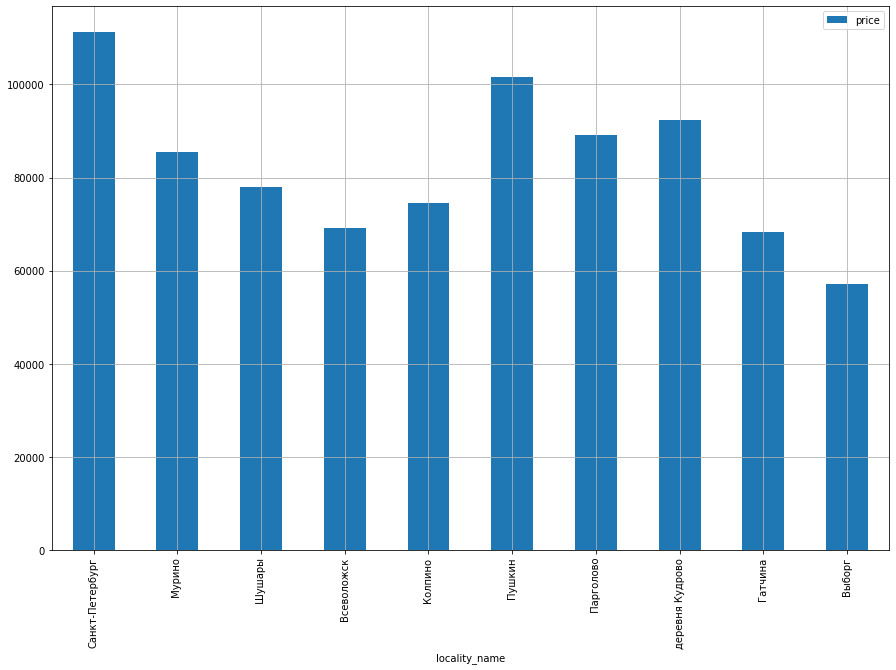

In [233]:
popular_towns = good_data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = ['count', 'mean'])

popular_towns.columns = ['count', 'price']
popular_towns = popular_towns.sort_values('count', ascending = False).reset_index().head(10)
popular_towns.plot(x = 'locality_name', y = 'price', grid = True, figsize = (15,10), kind = 'bar')
popular_towns

Максимальная стоимость квадратного метра объектов недвижимости приходитя на Санкт-Петербург, Пушкин Кудрово.
Это можно объяснить блихостью к административному центру.

Минимальная стоимость объектов недвижимости в Выборге. 

Оценим, как меняется стоимость квартир в зависимости от удаления от центра города. 

/tmp/ipykernel_25/2836659440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_objects['city_centers_km'] = spb_objects['city_centers_nearest']/1000
/tmp/ipykernel_25/2836659440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_objects['city_centers_km']= spb_objects['city_centers_km'].round(0)


<AxesSubplot:xlabel='city_centers_km'>

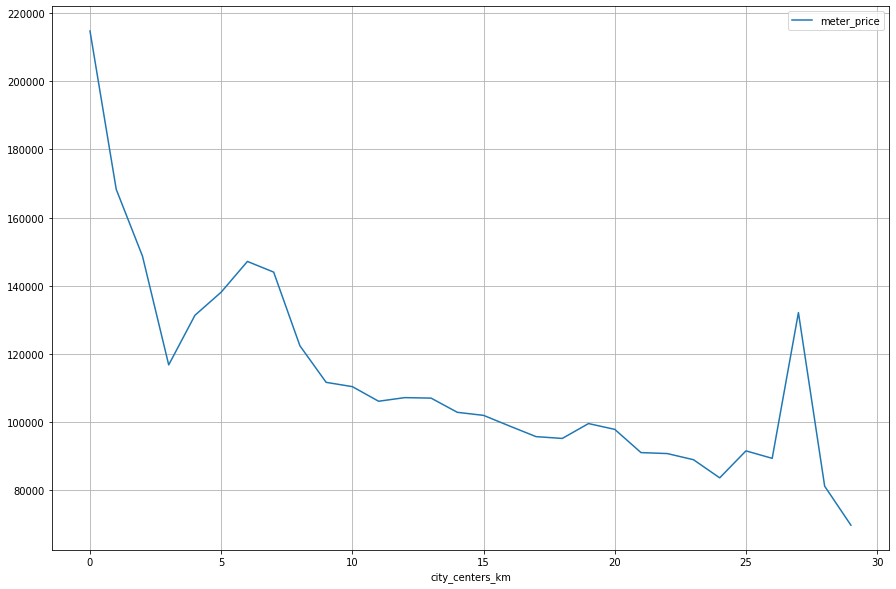

In [234]:
#Создадим датафрейм с объектами только в Санкт-Петербурге
spb_objects = good_data.query('location=="Санкт-Петербург"')

#Переведем метры в километры 
spb_objects['city_centers_km'] = spb_objects['city_centers_nearest']/1000
#Округлим удаленность от центра до км. 
spb_objects['city_centers_km']= spb_objects['city_centers_km'].round(0)
spb_objects['city_centers_km']



(spb_objects
 .pivot_table(index = 'city_centers_km', values = 'meter_price', aggfunc = 'mean')
 .plot(grid = True, figsize = (15,10)))


Видно значительное изменение графика на удаленности 6-7 км от центра. 
Данному удалению от центра соответствуют границы центральной части города. 
Также, отметим скачок графика в районе 26-27 км от центра города. Изучим данные подробнее. 

In [235]:
#Сделаем срез данных, чтобы проверить строки на аномальные значения в других колонках
display(spb_objects.query('city_centers_km>=26 & city_centers_km<=28').head())
display(spb_objects.query('city_centers_km>=26 & meter_price>110000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,is_selled,airport_distance_mean,city_center_distance_mean,floor_category,living_to_total_area,kitchen_to_total_area,day_of_week_exposition,month_exposition,year_exposition,city_centers_km
252,17,3340000,37.0,2018-03-28,1,2.65,5,19.000000,4,False,...,True,26786.0,12239.0,Другой,0.513514,0.270270,2,3,2018,26.0
535,13,3250000,40.0,2018-06-25,1,2.65,10,22.669246,1,False,...,True,26786.0,12239.0,Первый,0.566731,0.172414,0,6,2018,26.0
741,13,14350000,74.0,2017-11-28,2,3.13,5,30.000000,3,False,...,True,26786.0,12239.0,Другой,0.405405,0.337838,1,11,2017,27.0
806,0,7600000,111.0,2017-07-26,3,3.00,16,63.000000,12,False,...,True,26786.0,12239.0,Другой,0.567568,0.126126,2,7,2017,28.0
1100,0,4072000,38.0,2015-10-14,1,2.65,5,16.000000,4,False,...,True,26786.0,12239.0,Другой,0.421053,0.315789,2,10,2015,28.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,is_selled,airport_distance_mean,city_center_distance_mean,floor_category,living_to_total_area,kitchen_to_total_area,day_of_week_exposition,month_exposition,year_exposition,city_centers_km
741,13,14350000,74.00,2017-11-28,2,3.13,5,30.0,3,False,...,True,26786.0,12239.0,Другой,0.405405,0.337838,1,11,2017,27.0
11098,10,3724812,32.76,2018-10-10,1,2.65,5,15.0,3,False,...,True,26786.0,12239.0,Другой,0.457875,0.172414,2,10,2018,26.0
14008,18,4150000,36.00,2018-09-05,1,2.50,10,20.0,7,False,...,True,26786.0,12239.0,Другой,0.555556,0.194444,2,9,2018,26.0
14177,8,4300000,37.20,2019-04-03,1,2.64,5,15.0,3,False,...,True,26786.0,12239.0,Другой,0.403226,0.349462,2,4,2019,26.0
18942,10,2903659,24.67,2018-10-10,1,2.65,6,16.0,6,False,...,True,26786.0,12239.0,Последний,0.648561,0.172414,2,10,2018,26.0


<AxesSubplot:xlabel='city_centers_km'>

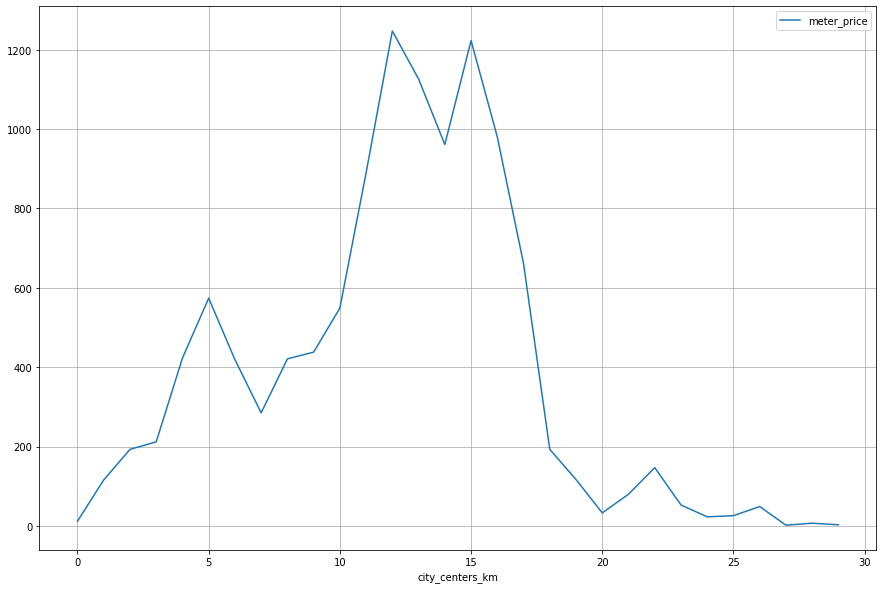

In [236]:
#Проверим количество значений для каждого километра удаления от центра. 
(spb_objects
 .pivot_table(index = 'city_centers_km', values = 'meter_price', aggfunc = 'count')
 .plot(grid = True, figsize = (15,10)))

Рост средней цены на удалении 26-27 км от центра Санкт-Петербурга можно объяснить малым количеством объявлений. 
А также, наличием современных элитных жк в этих районах. 

Проверим, каким образом коррелируют аналогичные характеристики объектов недвижимости внутри Санкт-Петербурга в сравнении с общим датафреймом. 

<AxesSubplot:>

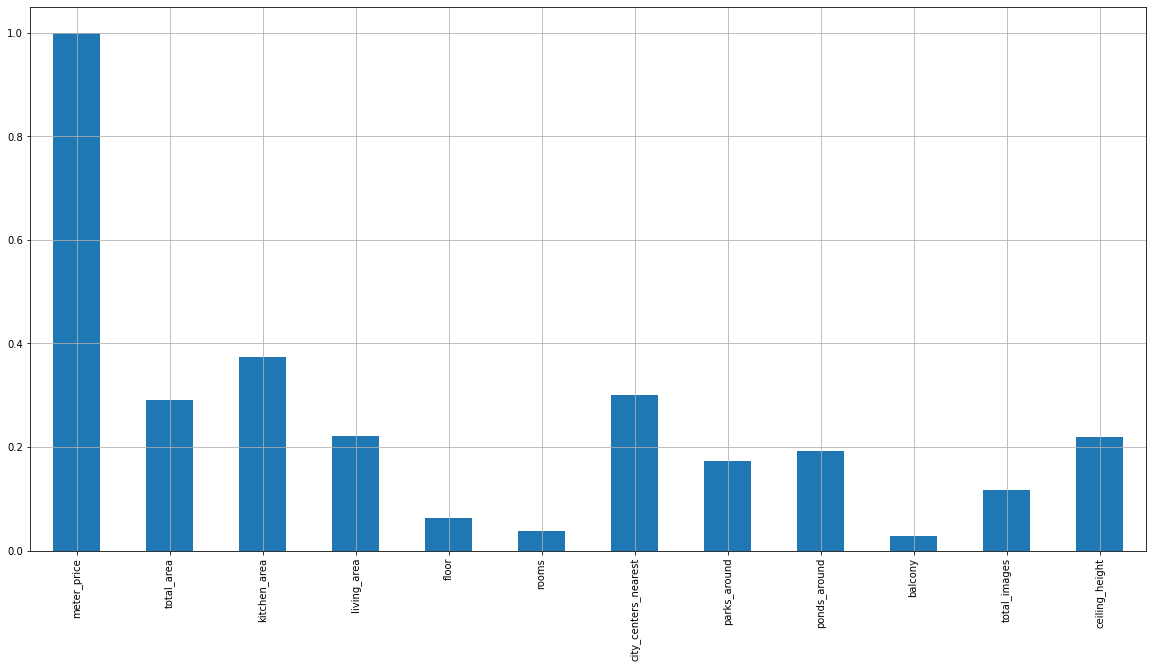

In [237]:
(
    spb_objects[['meter_price', 
               'total_area', 
               'kitchen_area', 
               'living_area', 
               'floor', 
               'rooms', 
               'city_centers_nearest', 
               'parks_around', 
               'ponds_around', 
               'balcony', 
               'total_images', 
               'ceiling_height']].corr()
    ['meter_price'].abs().plot(grid = True, figsize = (20,10), kind = 'bar')
)

<AxesSubplot:>

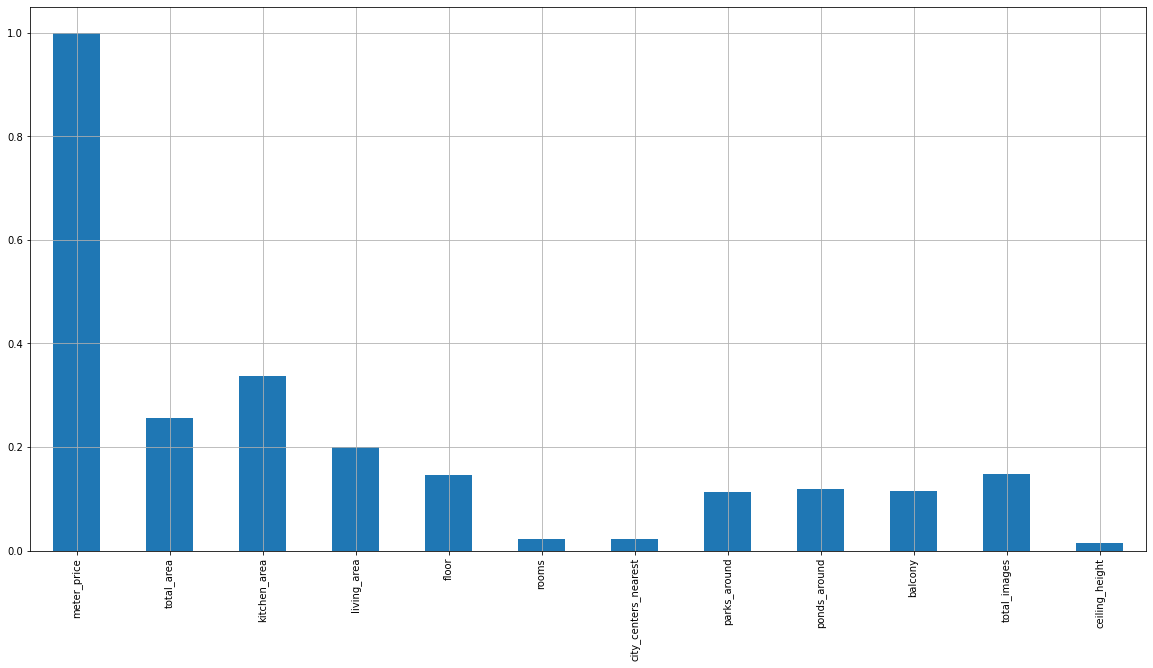

In [238]:
spb_center_objects = spb_objects.query('city_centers_km<7')

(
    spb_center_objects[['meter_price', 
               'total_area', 
               'kitchen_area', 
               'living_area', 
               'floor', 
               'rooms', 
               'city_centers_nearest', 
               'parks_around', 
               'ponds_around', 
               'balcony', 
               'total_images', 
               'ceiling_height']].corr()
    ['meter_price'].abs().plot(grid = True, figsize = (20,10), kind = 'bar')
)

Можно отметить, что для объектов недвижимости в Петербурге значительно меньшая кореляция между близостью объекта недвижимости к центру города и его ценой. 
Это может быть связано с:
    1. Более низким спросом на объекты недвижимости в центре из-за низкого уровня комфорта в квартирах исторической застройки. 
    2. Санкт-Петербург туристический город, в его центре всегда довольно шумно и людно, это снижает уровень комфорта.
    3. Развитым общественным транспортом, так как в Санкт-Петербурге можно достаточно быстро и комфортно добраться до центра города при необходимости. 

/tmp/ipykernel_25/219564199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_objects['day_of_week_exposition'] = spb_objects['first_day_exposition'].dt.dayofweek
/tmp/ipykernel_25/219564199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_objects['month_exposition'] = spb_objects['first_day_exposition'].dt.month
/tmp/ipykernel_25/219564199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

<AxesSubplot:xlabel='year_exposition'>

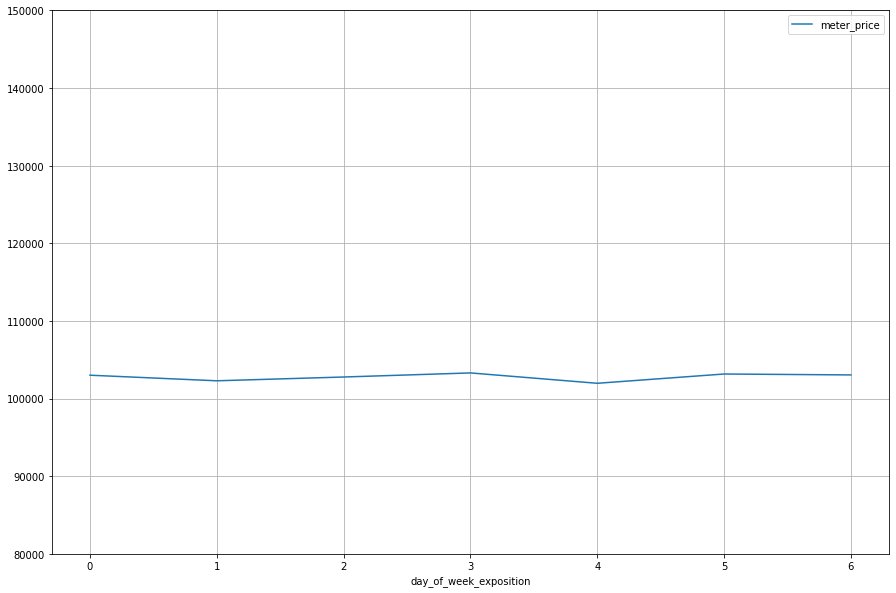

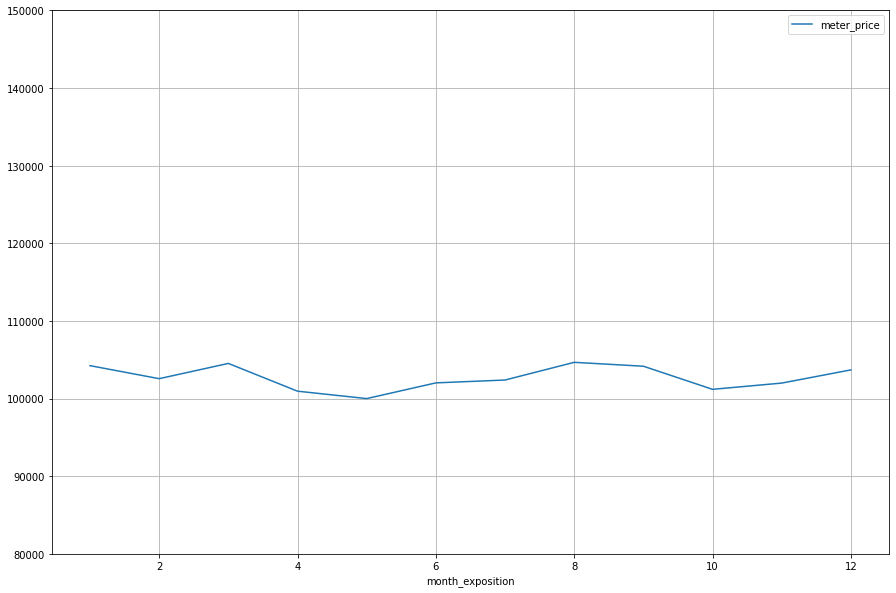

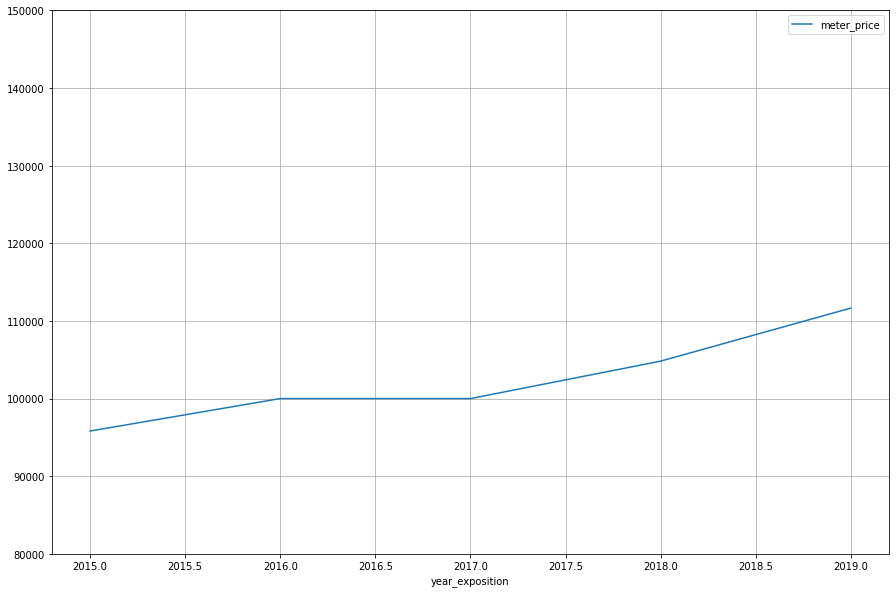

In [239]:
spb_objects['day_of_week_exposition'] = spb_objects['first_day_exposition'].dt.dayofweek
spb_objects['month_exposition'] = spb_objects['first_day_exposition'].dt.month
spb_objects['year_exposition'] = spb_objects['first_day_exposition'].dt.year

spb_objects.pivot_table(index = 'day_of_week_exposition', values = 'meter_price', aggfunc = 'median').plot(figsize = (15,10), grid = True, ylim = (80000, 150000))
spb_objects.pivot_table(index = 'month_exposition', values = 'meter_price', aggfunc = 'median').plot(figsize = (15,10), grid = True, ylim = (80000, 150000))
spb_objects.pivot_table(index = 'year_exposition', values = 'meter_price', aggfunc = 'median').plot(figsize = (15,10), grid = True, ylim = (80000, 150000))



По категориальным значениям в Санкт-Петербурге сохраняются тендеции, характерные общему датафрейму: 
1. День недели публиукации влияет незначительно
2. Месяц публикации влияет значительнее, чем день, летом квартиры дешевле, чем весной и зимой. 
3. Виден рост цены за кв метр недвижимости год к году. 

## Исследуем данные по непроданным объектам недвижимости

Составим отдельный датафрейм, где признак `is_selled` = True  и срок продажи объекта более 100 дней, чтобы исключить из выборки те объекты, чей срок продажи нельзя назвать долгим. 

In [242]:
bad_data = df.query('is_selled == False and days_exposition > 100')
bad_data['meter_price'].mean()

108989.52036597798

Проверим распределение стоимости недвижимости по удаленности от центра и сравним с данными квартир в Санкт-Петербурге

/tmp/ipykernel_25/3852777734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_data['city_centers_km'] = bad_data['city_centers_nearest']/1000
/tmp/ipykernel_25/3852777734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_data['city_centers_km']= bad_data['city_centers_km'].round(0)


<AxesSubplot:xlabel='city_centers_km'>

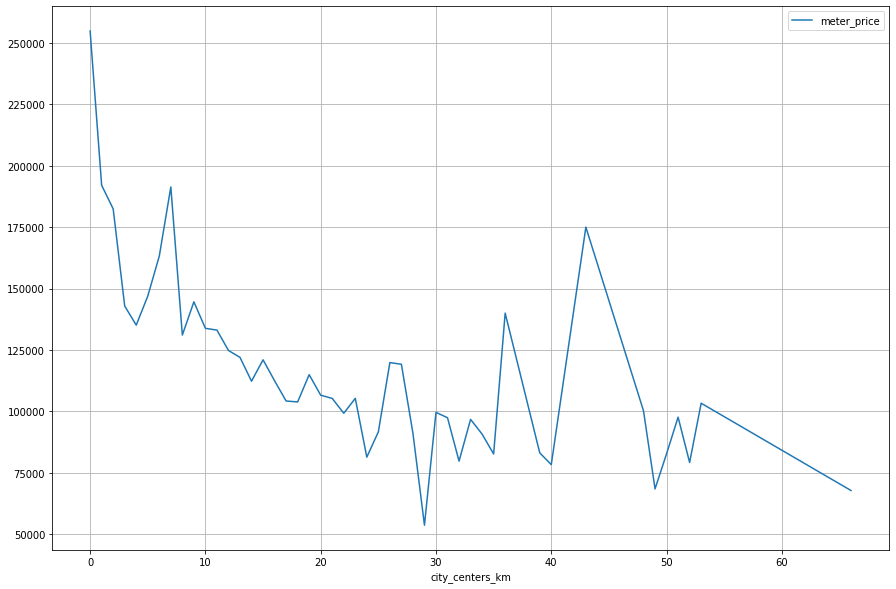

In [247]:
#Переведем метры в километры 
bad_data['city_centers_km'] = bad_data['city_centers_nearest']/1000
#Округлим удаленность от центра до км. 
bad_data['city_centers_km']= bad_data['city_centers_km'].round(0)
bad_data['city_centers_km']

(bad_data
 .pivot_table(index = 'city_centers_km', values = 'meter_price', aggfunc = 'mean')
 .plot(grid = True, figsize = (15,10)))



<AxesSubplot:xlabel='city_centers_km'>

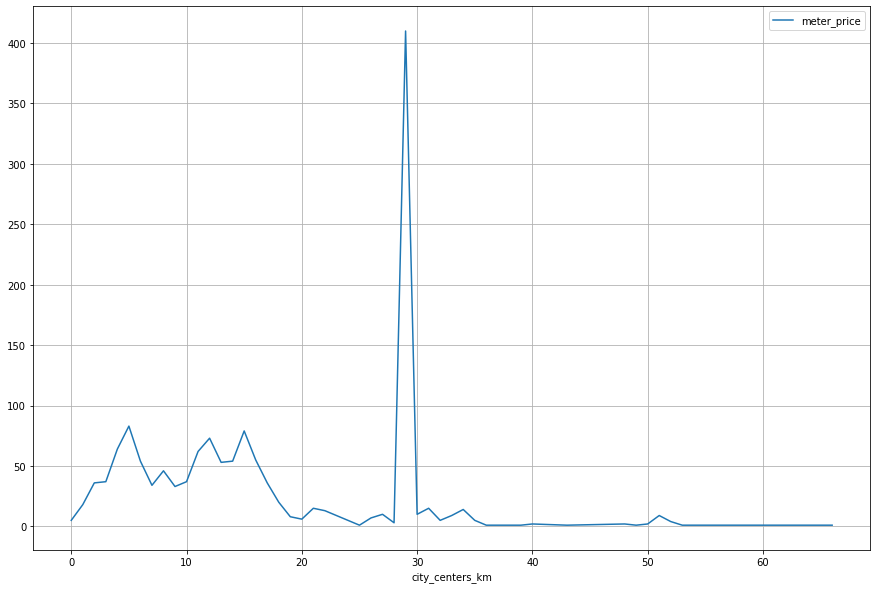

In [248]:
(bad_data
 .pivot_table(index = 'city_centers_km', values = 'meter_price', aggfunc = 'count')
 .plot(grid = True, figsize = (15,10)))

Из графиков видно, что высокая цена на кв метр недвижимости по непроданным объектам недвижимости связана с единичными аномальными предложениями с завышенной ценой. 
Данные объекты не оказывают влияния на рыночно

## Общий вывод

### Описание данных
В представленном архиве данных содержалась 23 699 строк объевлений о продаже недвижимости.
В некоторых колонках отсутствовали данные, пропущенные количественные значения были заполнены медианными с применением категоризаций и частично, удалены.
Далее, были категоризованы значения по географическому признаку и этажу объекта недвижимости.
Далее, были удалены объекты недвижимости с аномально высоким сроком продажи (>365 дней). Итоговый датафрейм `good_data` составил 19 787 строк. 

### Итоги исследования
Стоимость квадратного метра недвижимости подвержена влиянию различных характеристик в зависимости от локации: 
    1. Для Санкт-Петербурга наиболее значительная корреляция между стоимостью кв метра недвижимости заметна для параметров: площадь кухни, близость к центру города, общая площадь. (При этом, все три параметра имеют коэффицент корреляции ниже, чем 0,4) Для объявлений в центре Санкт-Петербурга (менее 7 км от центра города), коэффициенты корреляции еще ниже. Лидирующим показателем остается площадь кухни. Это можно объяснить тем, что в центре города стоимость кв метра базово высока за счет географического расположения и высокого спроса (варьируется между 150 000 и 200 000 р. за кв. м и, как следствие менее подвержена влиянию характеристик объектов недвижимости.)
    2. Для объектов недвижимости за пределами Санкт-Петербурга, определяющим фактором является близость к центру. В этом случае к административному центру, то есть к Санкт-Петербургу. Также, отметим кореляцию с ценой квадртного метра площади кухни и наличия парков и прудов. Выборка объектов Ленинградской области подверждает гипотезу, самые высокие цены в г.Пушкин и дер Кудрово, самые низкие в г Выборг. 
    3. Стоимость квадратного метра недвижимости в Санкт-Петербурге и Лен Области непрерывно растет с 2015 года. Это соответствует общему тренду по стране. Предположу влияние двух факторов:
        1. Большая инфляция отражается на стоимости недвижимости
        2. Люди считают недвижимость лучшим способом сбережения средств, это обеспечивает повышенный спрос. 

